In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt

In [2]:
df_emy = pd.read_csv('dataset.csv')
df_emy.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
df_emy.tail()

In [41]:
df_emy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [ ]:
df_emy.isnull().sum()

In [7]:
df_emy.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [12]:
df_emy['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [37]:
#Filtrei o "Office Supplies" na categoria de 'Produtos'
df_office = df_emy[df_emy['Categoria'] == 'Office Supplies']
#Agrupei por Cidade calculando a soma do Valor de Venda
df_group1 = df_office.groupby('Cidade')['Valor_Venda'].sum()

display(df_group1)

#Buscar a Cidade com o maior Valor de Venda no df_group1
df_group1.idxmax()
#OU
cidade1 = df_group1[df_group1 == df_group1.max()].index[0]
print("A cidade com maior Valor de Venda de Produtos na Categoria 'Office Supplies'é: {}" .format(cidade1))


Cidade
Aberdeen         25.500
Abilene           1.392
Akron          1107.646
Albuquerque     943.122
Alexandria     4879.790
                 ...   
Woonsocket      142.590
Yonkers         665.964
York            395.920
Yucaipa          50.800
Yuma             55.352
Name: Valor_Venda, Length: 480, dtype: float64

A cidade com maior Valor de Venda de Produtos na Categoria 'Office Supplies'é: New York City


2. Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras.

In [43]:
#Converter para Data pq estava como Objeto
df_emy['Data_Pedido'] = pd.to_datetime(df_emy['Data_Pedido'])

c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Emily\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

In [45]:
#Agrupar por Data de Pedido o Total de Vendas
df_group2_date = df_emy.groupby('Data_Pedido')['Valor_Venda'].sum()
display(df_group2_date)


Data_Pedido
2015-01-02     468.9000
2015-01-03    2203.1510
2015-01-04     119.8880
2015-01-06    5188.5200
2015-01-07     601.0240
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Valor_Venda, Length: 1226, dtype: float64

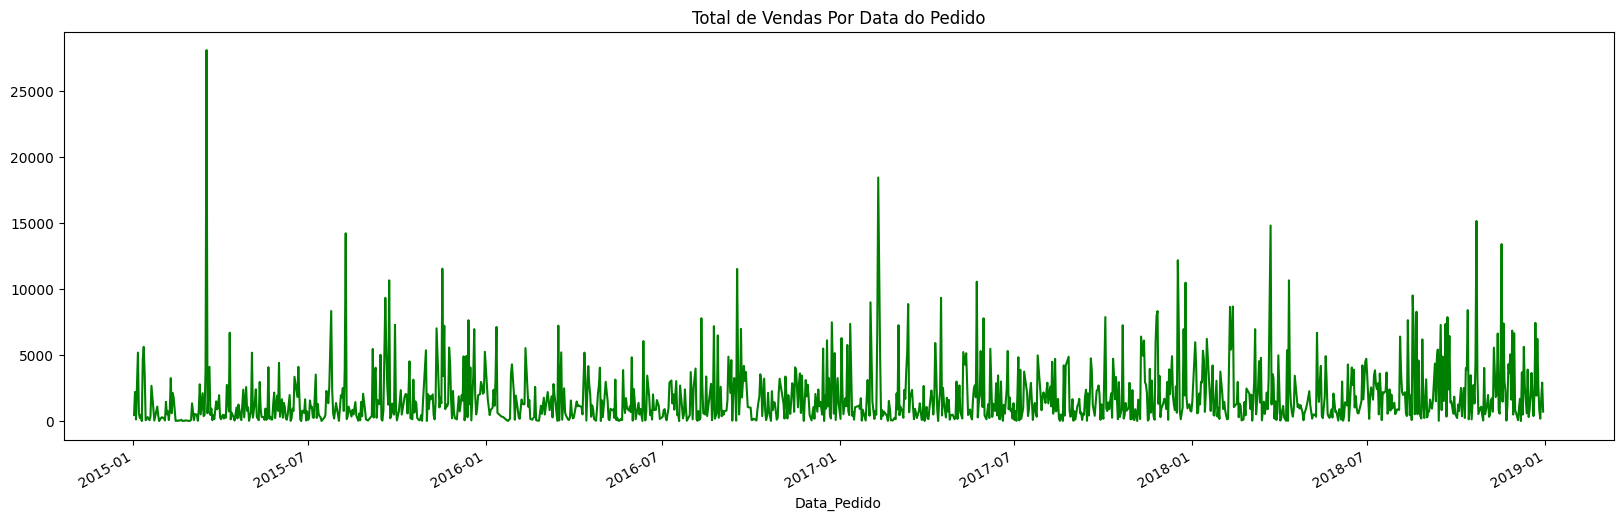

In [51]:
plt.figure(figsize = (20, 6))
df_group2_date.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

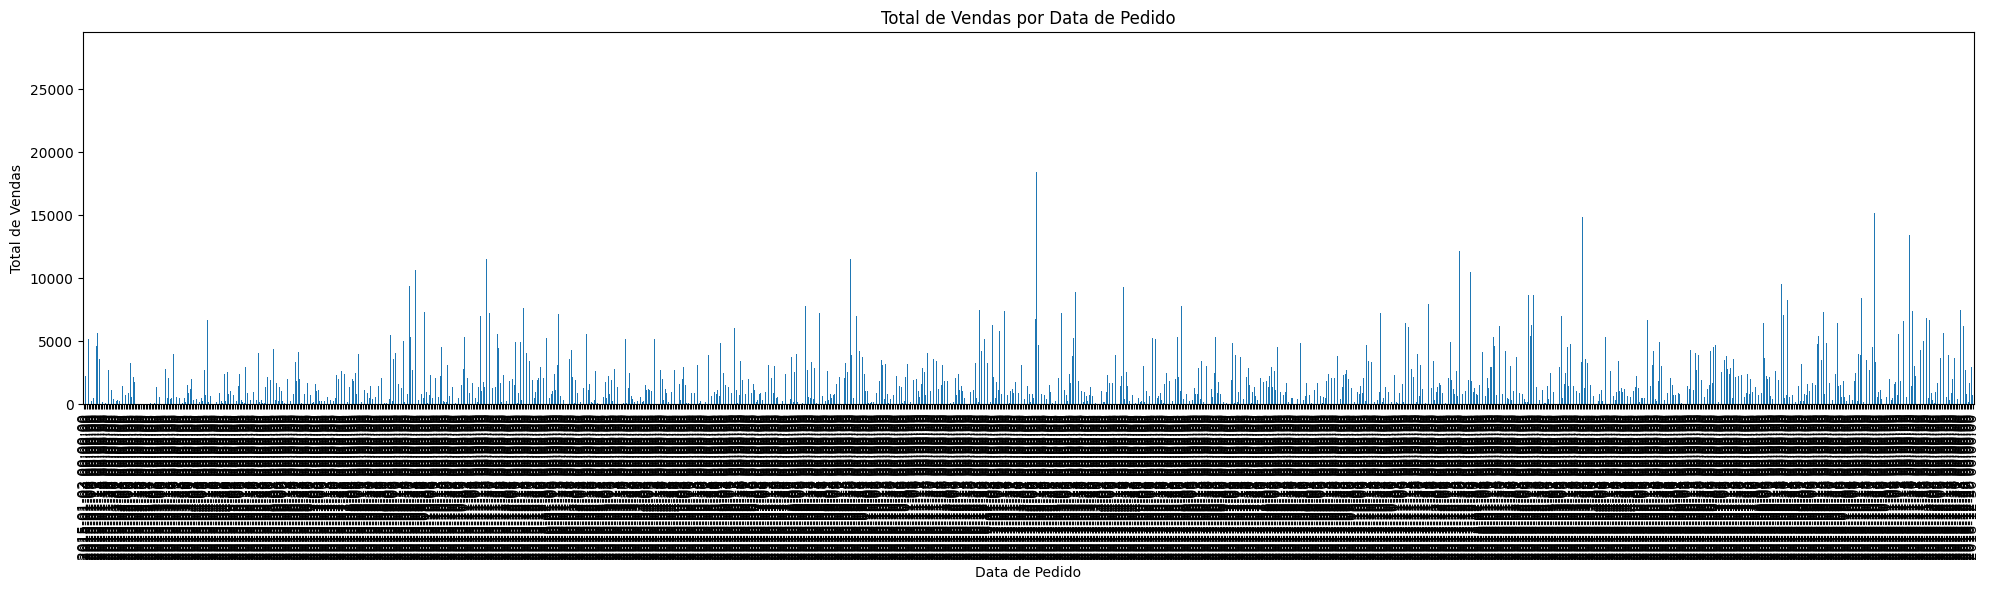

In [52]:
plt.figure(figsize=(20, 6))  # Tamanho da figura
df_group2_date.plot(kind='bar')  # Tipo de gráfico

plt.title('Total de Vendas por Data de Pedido')  # Título do gráfico
plt.xlabel('Data de Pedido')  # Rótulo do eixo x
plt.ylabel('Total de Vendas')  # Rótulo do eixo y

plt.tight_layout()  # Melhora o espaçamento

plt.show()  # Mostra o gráfico

3. Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

In [103]:
#Agrupar por Estado o Total de Vendas
df_group3_estado = df_emy.groupby('Estado')['Valor_Venda'].sum().reset_index()
display(df_group3_estado)


,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


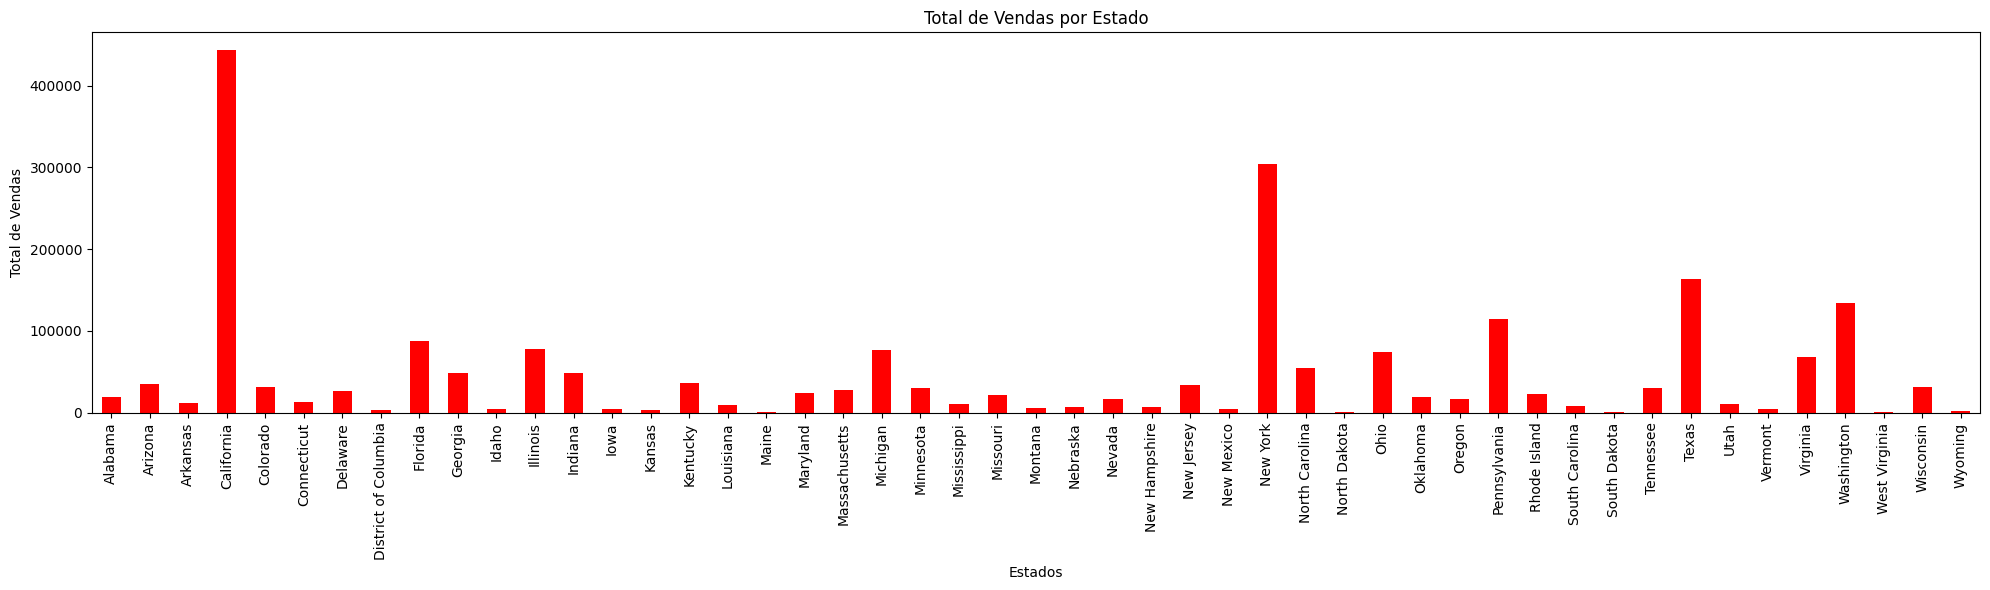

In [60]:
plt.figure(figsize=(20, 6))  # Tamanho da figura
df_group3_estado.plot(kind='bar', color='r')  # Tipo de gráfico

plt.title('Total de Vendas por Estado')  # Título do gráfico
plt.xlabel('Estados')  # Rótulo do eixo x
plt.ylabel('Total de Vendas')  # Rótulo do eixo y

plt.tight_layout()  # Melhora o espaçamento

plt.show()  # Mostra o gráfico

In [ ]:
plt.figure(figsize = (16, 6))
sea.barplot(data = df_group3_estado, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

4. Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.

In [102]:
#Filtrar o total de vendas por Cidade
df_group4_cidade = df_emy.groupby('Cidade')['Valor_Venda'].sum().reset_index()
df_group4_cidade.info()

#Ordenar as com 10 maiores valores
df_group4_cidade = df_group4_cidade.sort_values(by = 'Valor_Venda', ascending=False)
top_cidades = df_group4_cidade.head(10)
display(top_cidades)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cidade       528 non-null    object 
 1   Valor_Venda  528 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.4+ KB


,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


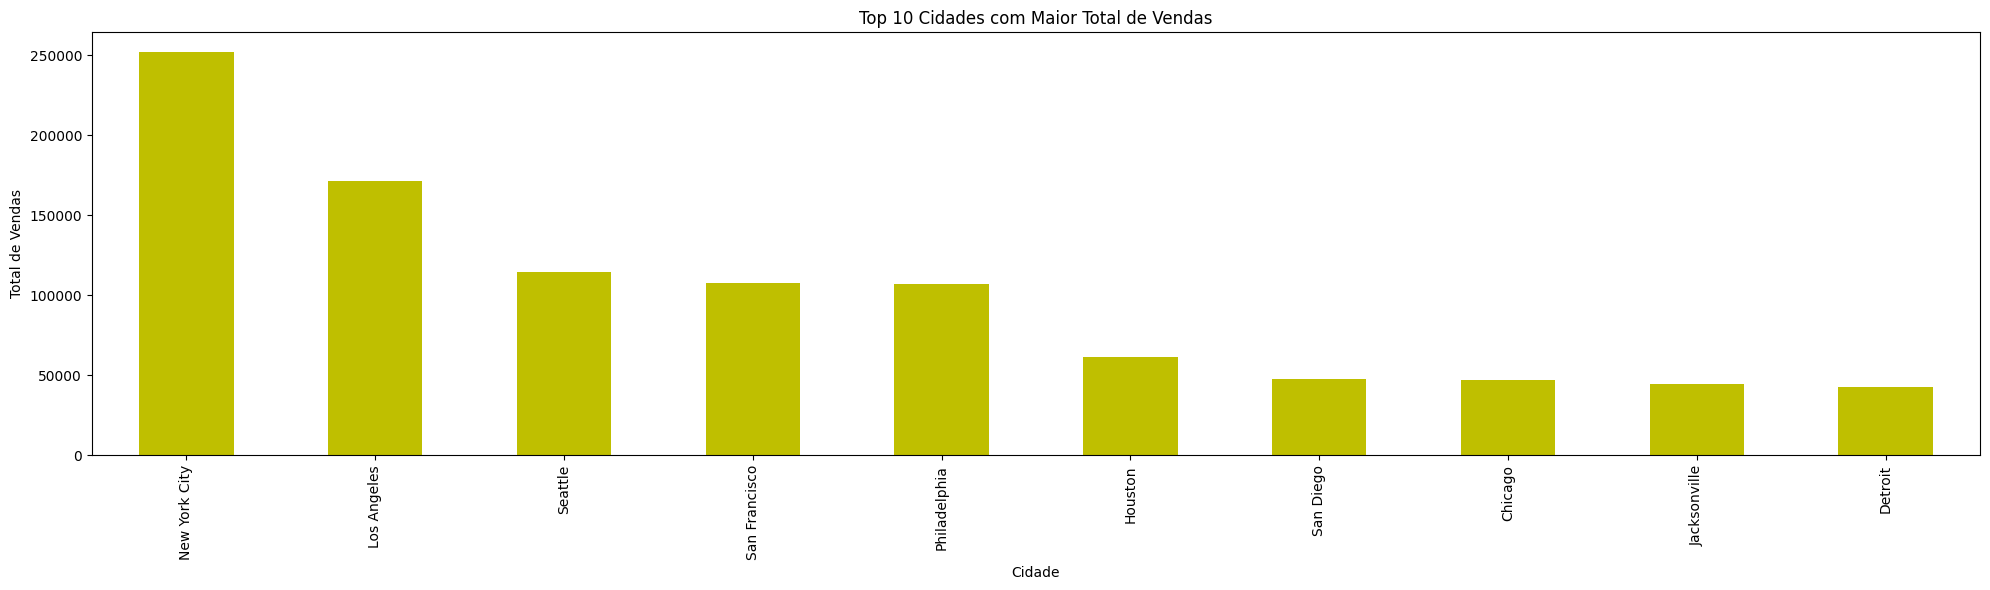

In [71]:
plt.figure(figsize=(20, 6))  # Tamanho da figura
top_cidades.plot(kind='bar', color='y')  # Tipo de gráfico

plt.title('Top 10 Cidades com Maior Total de Vendas')  # Título do gráfico
plt.xlabel('Cidade')  # Rótulo do eixo x
plt.ylabel('Total de Vendas')  # Rótulo do eixo y

plt.tight_layout()  # Melhora o espaçamento

plt.show()

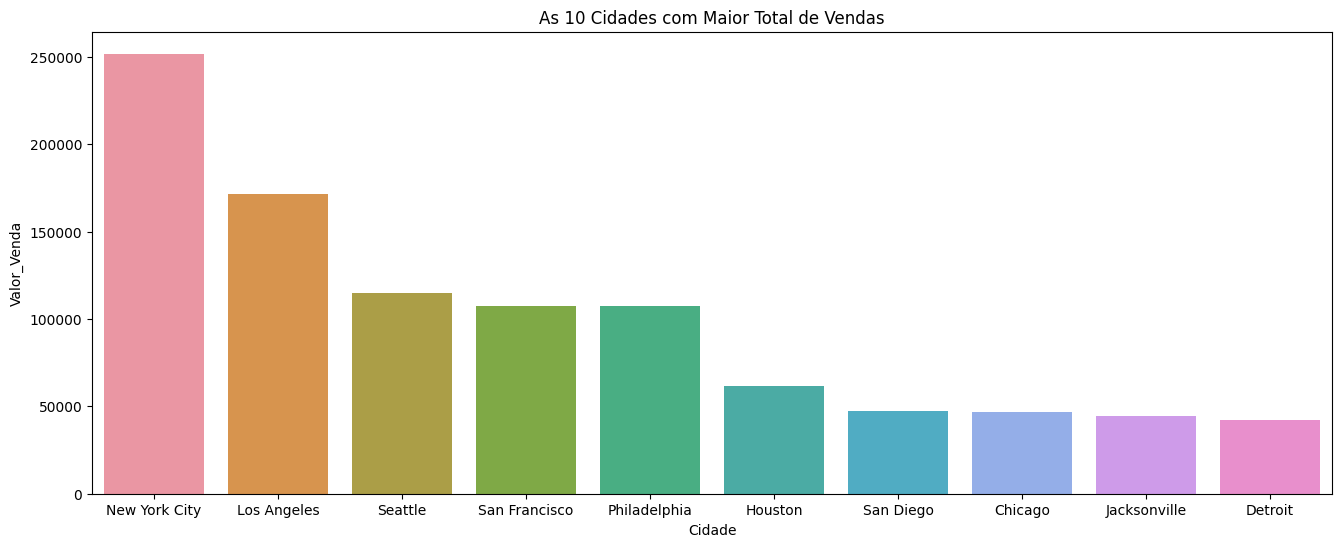

In [105]:
plt.figure(figsize = (16, 6))
sea.set_palette('coolwarm')
sea.barplot(data = top_cidades, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

5. Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza.

In [119]:
#Filtrar o total de vendas por Segmento
df_group5_seg = df_emy.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
display(df_group5_seg)

segmentos = df_group5_seg['Segmento'].tolist()
print(segmentos)


,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


['Consumer', 'Corporate', 'Home Office']


In [111]:
#Função para converter os dados em valores absolutos
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

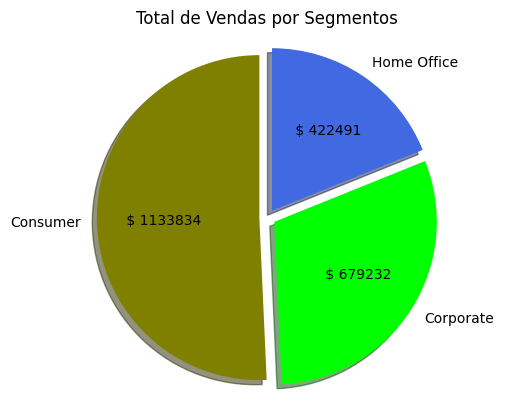

In [125]:
cores = ['olive', 'lime', 'royalblue']
plt.pie(df_group5_seg['Valor_Venda'], labels = segmentos, colors = cores, startangle = 90, shadow = True, explode = (0.05,0.05,0.05), autopct = autopct_format(df_group5_seg['Valor_Venda']))
plt.title('Total de Vendas por Segmentos')
plt.axis('equal')
plt.show()

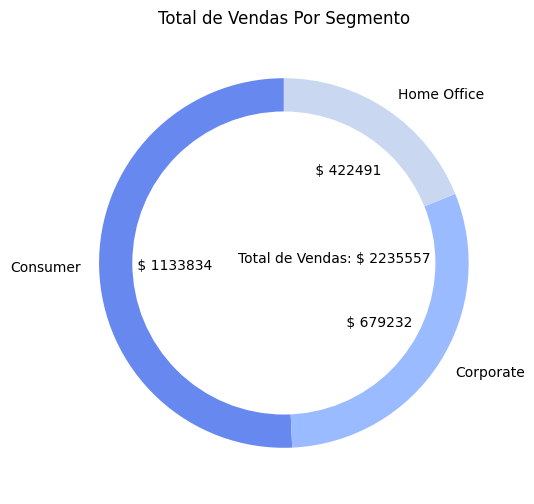

In [123]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_group5_seg['Valor_Venda'], 
        labels = df_group5_seg['Segmento'],
        autopct = autopct_format(df_group5_seg['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_group5_seg['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

6. Qual o Total de Vendas Por Segmento e Por Ano?